# Assignment 2

The probability distribution function, for two classes $\omega_1$ and $\omega_2$ and unknown $\theta$ is $$p(x|\theta) = \frac{1}{\pi}\frac{1}{1+(x-\theta)^2} $$

It is also known that $P(\omega_1) = 7/12$ and $P(\omega_2) = 5/12$.

## Part 1

Design a Maximum Likelihood Estimator and estimate $\hat{\theta_1}$ and $\hat{\theta_2}$ for both classes, when $D_1 = [2.8, −0.4, −0.8, 2.3, −0.3, 3.6, 4.1]$ and $D_2 = [−4.5, −3.4, −3.1, −3.0, −2.3]$. Draw $log(p(D_1|\theta))$ and $log(p(D_2|\theta))$.

In [1]:
## Run this cell before anything else
import numpy as np
from scipy.constants import pi
import matplotlib.pyplot as plt

d1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
d2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
a_priori_1 = 7 / 12
a_priori_2 = 5 / 12
dx = 0.001
theta_array = np.arange(-10, 10, dx)


/tmp/ipykernel_69189/1296387527.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  value = np.sum(np.log((1 / pi) * 1 / (1 + pow(x[i] - theta, 2))) for i in range(len(x)))


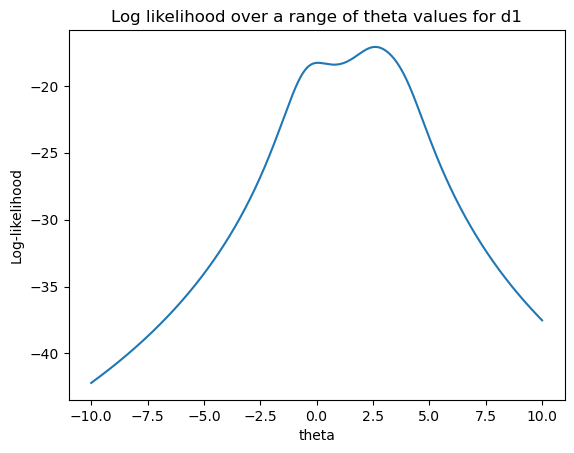

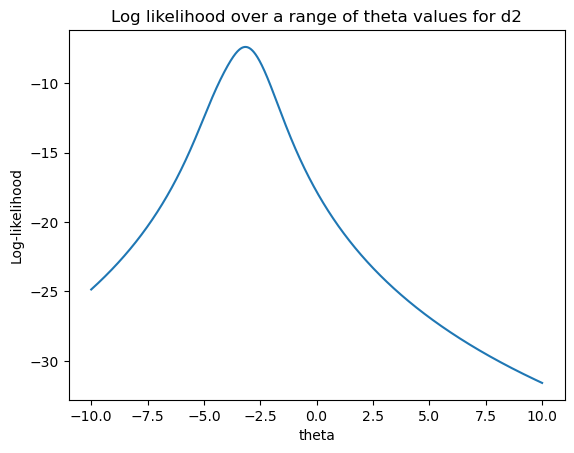

In [2]:
def log_likelihood(x, theta):
    value = np.sum(np.log((1 / pi) * 1 / (1 + pow(x[i] - theta, 2))) for i in range(len(x)))
    return value

def calculate_log_likelihood(theta_array, d):
    LL = []  # log likelihood
    for theta in theta_array:
        loglike = log_likelihood(d, theta)
        LL.append(loglike)
    return LL

logLikelihood1 = calculate_log_likelihood(theta_array, d1)
logLikelihood2 = calculate_log_likelihood(theta_array, d2)

plt.plot(theta_array, logLikelihood1)
plt.xlabel('theta')
plt.ylabel('Log-likelihood')
plt.title('Log likelihood over a range of theta values for d1')
plt.show()

plt.plot(theta_array, logLikelihood2)
plt.xlabel('theta')
plt.ylabel('Log-likelihood')
plt.title('Log likelihood over a range of theta values for d2')
plt.show()



### Question 2
Use the discriminant function $$g(x) = log(p(x|\hat{theta_1}) - log(p(x|\hat{theta_2}) + P(\omega_1) - P(\omega_2)$$
and classify the two ΣΥΝΟΛΑ ΤΙΜΩΝ. What can we conclude about the sign of g(x)? Describe the rule of decision.

Estimation of theta 1:  2.599999999993017
Estimation of theta 2:  -3.1590000000037914
[0 0 0 0 0 0 0 1 1 1 1 1]


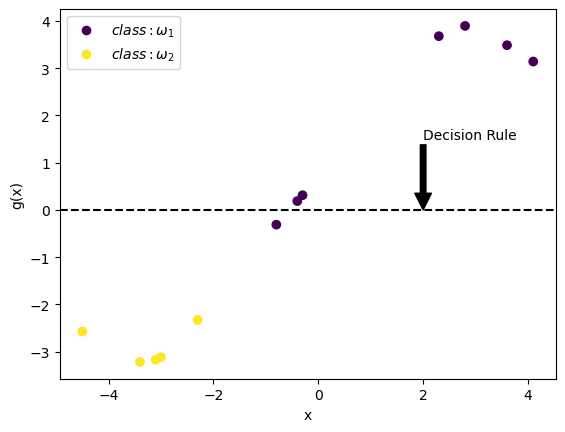

In [3]:
def probability_distribution(x, theta):
    value = (1 / pi) * 1 / (1 + pow(x - theta, 2))
    return value


def predict(d, theta_1, theta_2, a_priori_1, a_priori_2):
    class_1 = []
    class_2 = []
    values_class_1 = []
    values_class_2 = []
    for x in d:
        value = np.log(probability_distribution(x, theta_1)) - np.log(probability_distribution(x, theta_2)) + np.log(
            a_priori_1) - np.log(a_priori_2)
        if value > 0:
            class_1.append(x)
            values_class_1.append(value)
        else:
            class_2.append(x)
            values_class_2.append(value)
    return class_1, class_2, values_class_1, values_class_2

best_theta_1 = theta_array[
    logLikelihood1.index(max(logLikelihood1))]  # Find the x value corresponding to the maximum y value
print("Estimation of theta 1: ", best_theta_1)

max_ll2 = max(logLikelihood2)  # Find the maximum y value
best_theta_2 = theta_array[
    logLikelihood2.index(max(logLikelihood2))]  # Find the x value corresponding to the maximum y value
print("Estimation of theta 2: ", best_theta_2)

class_1, class_2, values_class_1, values_class_2 = predict(np.concatenate((d1, d2)), best_theta_1, best_theta_2,
                                                           a_priori_1, a_priori_2)
def color_assignment(given_class, d1, d2):
    color = []
    for i in range(np.size(given_class)):
        if given_class[i] in d1:
            color.append(0)
        elif given_class[i] in d2:
            color.append(1)
    return color


color_class_1 = color_assignment(class_1, d1, d2)
color_class_2 = color_assignment(class_2, d1, d2)

colors = np.concatenate((color_class_1, color_class_2))
labels = ['$ class: \omega_1$', '$ class: \omega_2$', '$ Decision rule']

fig, ax = plt.subplots()
scatter = ax.scatter([class_1, class_2], [values_class_1, values_class_2], c=colors)
ax.axhline(y=0, color="black", linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
ax.annotate("Decision Rule", xy=(2, 0), xytext=(2, 1.5), arrowprops=dict(facecolor='black', shrink=0.0001))
handles = scatter.legend_elements(num=[0, 1])[0]
ax.legend(handles=handles, labels=labels)
plt.show()


## Part 2

In this part a Bayesian Classifier is designed for the estimation of the unknown parameter $\theta$.
The prior probability of $\theta$ is given by the following equation $$p(\theta) = \frac{1}{10\pi}frac{1}{1+(\theta/10)^2}$$
Based on the Bayesian theory the a-posteriori probability $p(\theta|D)$ and the probability density function $P(x|D_j),j=1,2$ can be calculated.

### Question 1
Draw the a-posteriori probabilities $P(x|D_1)$ and $P(x|D_2)$. Compare them with $p(\theta)$.


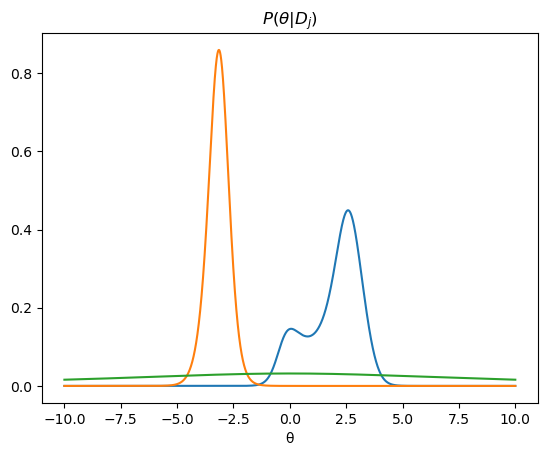

In [7]:
def likelihood(x, theta):
    x = [(1 / pi) * 1 / (1 + pow(x[i] - theta, 2)) for i in range(len(x))]
    value = np.prod(x)
    return value

def calculate_likelihood(theta_array, d):
    likelihood_list = []  # log likelihood
    for theta in theta_array:
        like = likelihood(d, theta)
        likelihood_list.append(like)
    return likelihood_list

def prior_distribution(theta_array):
    p_theta = []
    for theta in theta_array:
        value = (1 / (10 * pi)) * 1 / (1 + pow(theta / 10, 2))
        p_theta.append(value)
    return p_theta

def posterior_distribution(likelihood, p_theta, theta_array):
    numerator = np.multiply(likelihood, p_theta)
    denominator = np.trapz(numerator, x=theta_array)
    posterior = numerator / denominator
    return posterior


likelihood1 = calculate_likelihood(theta_array, d1)
likelihood2 = calculate_likelihood(theta_array, d2)
p_theta = prior_distribution(theta_array)
posterior1 = posterior_distribution(likelihood1, p_theta, theta_array)
posterior2 = posterior_distribution(likelihood2, p_theta, theta_array)

plt.plot(theta_array, posterior1)
plt.plot(theta_array, posterior2)
plt.plot(theta_array, p_theta)
plt.xlabel('θ')
plt.title("$ P(θ | D_j) $")
plt.show()

### Question 3

Create a predict function that calculates the values of a discriminant function $$h(x) = log(P(x|D_1) - log(P(x|D_2) + P(\omega_1) - P(\omega_2)$$
Compare Bayes and MLE method for parameter estimation for this specific example.